<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [253]:
from util import get_subway_graph, draw_subway_graph
from graph import Graph
import random
G, lines = get_subway_graph('csv', Graph)


def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    """Se crea lista para agregar los nodos visitados para asi no repetirlos cuando veamos los vecinos, una lista de pendientes
    donde cogeremos de ella el que tenga la distancia mas pequeña una variable infinity, una copia del la cantidad de nodos y el 
    arbol que retornaremos al final del programa. """
    alfa = origin
    visited = []
    pending = []   
    _num_nodes = len(G)
    sumador = 0
    infinity = 999999999999999
    global tree
    tree = Graph()

    
    """Inicializamos todos los nodos a infinito excepto el primero que sera 0 y añadimos un atributo para saber cual es el nodo 
    previo. En este caso añadimos nodos al arbol (aunque no hace falta ya que al añadir las aristas esto ya se hace) para poder
    mostrar en el test la diferencia que hay en el metro de londres. Tambien añadimos sus atributos para poder dibujarlo.
    """
    
    for i in G.nodes():
        G.node[i].update({'dist_actual': infinity})
        G.node[i].update({'node_prev': None})
        tree.add_node(i,G.node[i])
    #G.node[origin]['dist_actual'] = 0
  
    
    
    """Sabemos que un arbol tiene un total de aristas de nº de vertices - 1 por lo que iteraremos v-1 veces i a cada iteracion
    se agregara una arista """
    while _num_nodes > 0:
        inf = infinity

        """Se miran los vecinos del nodo actual i en caso de que este no este visitado o no este en la lista de pendientes se 
        agregara en esta."""
        for i in G.neighbors(origin):
            if i not in pending and i not in visited:
                pending.append(i)


        """Si la distancia del nodo al que estamos mirando a la de los nodos vecinos es mas pequeña que tiene se modificara por 
        esta y se dira desde que nodo la tiene."""
        for i in G.edge[origin]:
            """if G.node[i]['dist_actual'] == None:
                G.node[i]['dist_actual'] = G.edge[origin][i]['distance']
                G.node[i]['node_prev'] = origin
            
            else:"""
            if G.node[i]['dist_actual'] > G.edge[origin][i]['distance']:
                G.node[i]['dist_actual'] = G.edge[origin][i]['distance']
                G.node[i]['node_prev'] = origin


        """El nodo actual se agregara en la lista de visitados."""
        if origin not in visited:
            visited.append(origin)
        
        """De todos los nodos en pendiente se cogera el que tiene la distancia minima teniendo en cuenta de que ya no cogeremos 
        los nodos que ya han sido visitados."""
       
        
        """b = [a for a in pending if a not in visited]
        if (len(b) != 0):
            x = b[0]
            dist = G.node[x]['dist_actual']
            origin = x
        #print (dist)
            for i in pending:          
                if G.node[i]['dist_actual'] < dist and i not in visited:
                    dist = G.node[i]['dist_actual'] 
                    origin = i"""
        
        for i in pending:          
            if G.node[i]['dist_actual'] < inf and i not in visited:
                dist = G.node[i]['dist_actual'] 
                origin = i
            
                    

        
                
        """Como el nodo que estamos mirando es el que tiene distancia minima de los que estamos mirando agregamos la arista de 
        este y del nodo previo al que viene. Al agregar la lista se añade los atributos que ya tenia pero esto es para poder
        mostrar la diferencia que habia en el primer grafo de metros y en el segundo (arbol)."""
        tree.add_edge(G.node[origin]['node_prev'],origin,G.edge[G.node[origin]['node_prev']][origin])   
        sumador += tree.edge[origin][G.node[origin]['node_prev']]['distance']
        """Decrementamos uno en señal de que se ha agregado una arista"""
        _num_nodes -= 1
    
    """Retornamos el arbol"""
    #print (len(tree.edges()))
    return tree,sumador,alfa
    

In [254]:
#nd = G.nodes()
#origin = random.choice(nd)
# Resultado = 4.366628644885132,81,9,196
#194,54
#238,275
origin = 10
prim(G, origin)

(<graph.Graph at 0x1c752325320>, 4.669257649988149, 10)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>

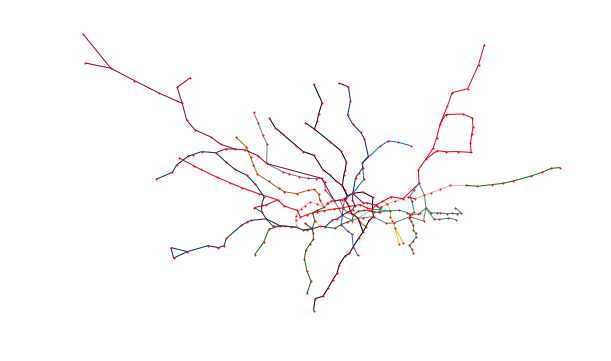

nº de aristas =  353


In [229]:
draw_subway_graph(G, lines, figsize=(10,6))
print ("nº de aristas = ",len((G).edges()))

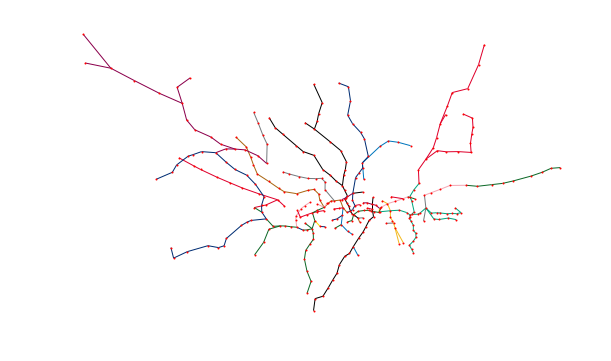

nº de aristas =  305


In [230]:
draw_subway_graph(tree, lines, figsize=(10,6),show_labels=False)
print ("nº de aristas = ",len(tree.edges()))

<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

La complexidad del algoritmo es de O(n^3) debido a que hay un while, dentro de este hay un for y dentro de este hay un if que usa el "in" que lo que hace es mirar si elemento esta en la lista pero lo hace de uno en uno es como si fuera otro for.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>